In [1]:
# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

# Asthma Dataset
file_path = 'asthma.csv'
df = pd.read_csv(file_path)

# Adjust pd settings
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


<h1 style='text-align: center; color:#003049'>Identification of Asthma Diagnosis</h1>
<hr><br>
<h4>The project aims to develop a model to predict asthma likelihood based on demographic, lifestlye, enviromental factors and symptoms</h4><br>


<h3>Patient ID</h3>
<ul>
<li><strong>PatientID</strong>: A unique identifier assigned to each patient (5034 to 7425).</li>
</ul>
<h3>Demographic Details</h3>
<ul>
<li><strong>Age</strong>: The age of the patients ranges from 5 to 80 years.</li>
<li><strong>Gender</strong>: Gender of the patients, where 0 represents Male and 1 represents Female.</li>
<li><strong>Ethnicity</strong>: The ethnicity of the patients, coded as follows:</li>
<li>0: Caucasian</li>
<li>1: African American</li>
<li>2: Asian</li>
<li>3: Other</li>
<li><strong>EducationLevel</strong>: The education level of the patients, coded as follows:</li>
<li>0: None</li>
<li>1: High School</li>
<li>2: Bachelor's</li>
<li>3: Higher</li>
</ul>
<h3>Lifestyle Factors</h3>
<ul>
<li><strong>BMI</strong>: Body Mass Index of the patients, ranging from 15 to 40.</li>
<li><strong>Smoking</strong>: Smoking status, where 0 indicates No and 1 indicates Yes.</li>
<li><strong>PhysicalActivity</strong>: Weekly physical activity in hours, ranging from 0 to 10.</li>
<li><strong>DietQuality</strong>: Diet quality score, ranging from 0 to 10.</li>
<li><strong>SleepQuality</strong>: Sleep quality score, ranging from 4 to 10.</li>
</ul>
<h2>Environmental and Allergy Factors</h2>
<ul>
<li><strong>PollutionExposure</strong>: Exposure to pollution, score from 0 to 10.</li>
<li><strong>PollenExposure</strong>: Exposure to pollen, score from 0 to 10.</li>
<li><strong>DustExposure</strong>: Exposure to dust, score from 0 to 10.</li>
<li><strong>PetAllergy</strong>: Pet allergy status, where 0 indicates No and 1 indicates Yes.</li>
</ul>
<h2>Medical History</h2>
<ul>
<li><strong>FamilyHistoryAsthma</strong>: Family history of asthma, where 0 indicates No and 1 indicates Yes.</li>
<li><strong>HistoryOfAllergies</strong>: History of allergies, where 0 indicates No and 1 indicates Yes.</li>
<li><strong>Eczema</strong>: Presence of eczema, where 0 indicates No and 1 indicates Yes.</li>
<li><strong>HayFever</strong>: Presence of hay fever, where 0 indicates No and 1 indicates Yes.</li>
<li><strong>GastroesophagealReflux</strong>: Presence of gastroesophageal reflux, where 0 indicates No and 1 indicates Yes.</li>
</ul>
<h2>Clinical Measurements</h2>
<ul>
<li><strong>LungFunctionFEV1</strong>: Forced Expiratory Volume in 1 second (FEV1), ranging from 1.0 to 4.0 liters.</li>
<li><strong>LungFunctionFVC</strong>: Forced Vital Capacity (FVC), ranging from 1.5 to 6.0 liters.</li>
</ul>
<h2>Symptoms</h2>
<ul>
<li><strong>Wheezing</strong>: Presence of wheezing, where 0 indicates No and 1 indicates Yes.</li>
<li><strong>ShortnessOfBreath</strong>: Presence of shortness of breath, where 0 indicates No and 1 indicates Yes.</li>
<li><strong>ChestTightness</strong>: Presence of chest tightness, where 0 indicates No and 1 indicates Yes.</li>
<li><strong>Coughing</strong>: Presence of coughing, where 0 indicates No and 1 indicates Yes.</li>
<li><strong>NighttimeSymptoms</strong>: Presence of nighttime symptoms, where 0 indicates No and 1 indicates Yes.</li>
<li><strong>ExerciseInduced</strong>: Presence of symptoms induced by exercise, where 0 indicates No and 1 indicates Yes.</li>
</ul>
<h2>Diagnosis Information</h2>
<ul>
<li><strong>Diagnosis</strong>: Diagnosis status for Asthma, where 0 indicates No and 1 indicates Yes.</li>
</ul>


# Table of Contents

1. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis)
    - [Data Preprocessing](#)
    - [Feature Engineering](#Feature-Engineering)
    - [Data Visualization](#Data-Visualization)
2. [Machine Learning](#Machine-Learning)
    - [Data Preprocessing](#Data-Preprocessing)
    - [Model Implementation](#Model-Implementation)
    - [Model Performance](#Model-Performance)
    - [Model Coefficients](#)
3. [Final Interpretation](#Project-Summary)



In [3]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,1,0,0,0,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,0,1,0,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [4]:
df.shape

(2392, 29)

In [5]:
df.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [8]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,5.013030,5.114221,4.981864,0.165970,0.301003,0.399247,0.191890,0.253344,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,2.935605,2.893088,2.859192,0.372131,0.458790,0.489846,0.393869,0.435017,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,0.001022,0.000659,0.002434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,2.432559,2.599996,2.467489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,5.036519,5.098452,4.903278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,7.630037,7.708836,7.432218,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7425.000000,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,9.998964,9.999555,9.999708,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# We dont need this information
df = df.drop(["DoctorInCharge", "PatientID"], axis=1)

In [10]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,1,0,0,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,0,1,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0


<h1 style="color: #ca9843;">Exploratory Data Analysis</h1>


<h3>Data Preprocessing</h3>

In [13]:
df['Gender'] = df['Gender'].replace({0: 'Male', 1: 'Female'})
df['Ethnicity'] = df['Ethnicity'].replace({0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'})
df['EducationLevel'] = df['EducationLevel'].replace({0: 'None', 1: 'High School', 2: "Bachelor's", 3: 'Higher'})
df['Smoking'] = df['Smoking'].replace({0: 'No', 1: 'Yes'})

<h3>Feature Engineering</h3>

In [15]:
# BMI Classify
bmi_bins = [0, 18.5, 25, 30, 40, float('inf')]
labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obesity', 'Severe Obesity']

df['BmiClass'] = pd.cut(df['BMI'], bins=bmi_bins, labels=labels, right=False)

# Life Score (0-10) Higher the better.

# Since Sleep quality ranges between 4 and 10 i will normalize the value
df['NormalizedSleepQuality'] = (df['SleepQuality'] - 4) / (10 - 4) * 10
# Life Score (0-10) Higher the better.
df['LifeScore'] = (df['PhysicalActivity'] + df['DietQuality'] + df['NormalizedSleepQuality']) / 3

# Environmental Factor Score (0-10) Lower the better.
df['EnvScore'] = (df['PollutionExposure'] + df['PollenExposure'] + df['DustExposure']) / 3

# Symptom Score (0-12) Lower the better
df['SymptomScore'] = df[['PetAllergy', 'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever', 
                        'GastroesophagealReflux', 'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 
                        'Coughing', 'NighttimeSymptoms', 'ExerciseInduced']].sum(axis=1)

# Fev1 / FVC ratio 
df['FEV1/FVC_Ratio'] = df['LungFunctionFEV1'] / df['LungFunctionFVC']

df.head()


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,BmiClass,NormalizedSleepQuality,LifeScore,EnvScore,SymptomScore,FEV1/FVC_Ratio
0,63,Male,African American,None,15.848744,No,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0,Underweight,7.835005,4.739383,3.739466,4,0.277068
1,26,Female,Asian,Bachelor's,22.757042,No,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,1,0,0,0,2.197767,1.702393,1,0,0,1,1,1,0,Healthy Weight,1.923277,4.720540,5.337378,5,1.290987
2,57,Male,Asian,High School,18.395396,No,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0,Underweight,4.734411,6.890005,2.784860,8,0.338077
3,40,Female,Asian,High School,38.515278,No,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,0,1,0,3.032037,2.300159,1,0,1,1,1,0,0,Obesity,0.421726,2.550920,4.039689,5,1.318186
4,61,Male,Caucasian,Higher,19.283802,No,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0,Healthy Weight,9.376332,5.702624,4.097096,5,1.131243


<h3>Data visualisation</h3>

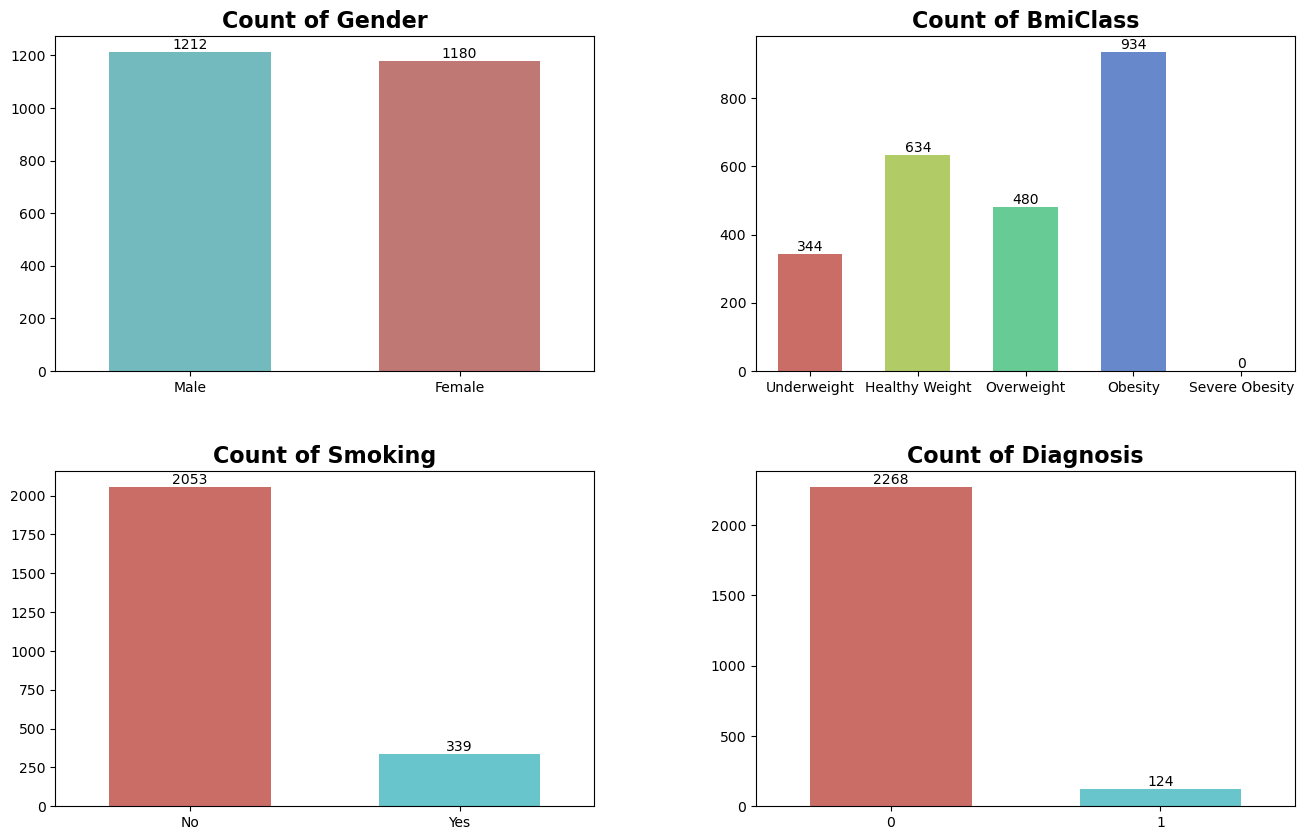

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

features = ["Gender", "BmiClass", "Smoking", "Diagnosis"]
colors = {
    "Gender": ["#67c5cb", "#cb6d67"],  
    "BmiClass": "hls",
    "Smoking": "hls",
    "Diagnosis": "hls"
}

for i, feature in enumerate(features):
    ax = axes[i // 2, i % 2]  
    if feature == "Gender":
        sns.countplot(data=df, x=feature, ax=ax, width=0.6, palette=colors[feature])
    else:
        sns.countplot(data=df, x=feature, ax=ax, width=0.6, palette=colors[feature])
    
    ax.set_title(f'Count of {feature}', fontsize=16, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    for container in ax.containers:
        ax.bar_label(container, fontsize=10)


plt.subplots_adjust(wspace=0.3, hspace=0.3) 
plt.show()

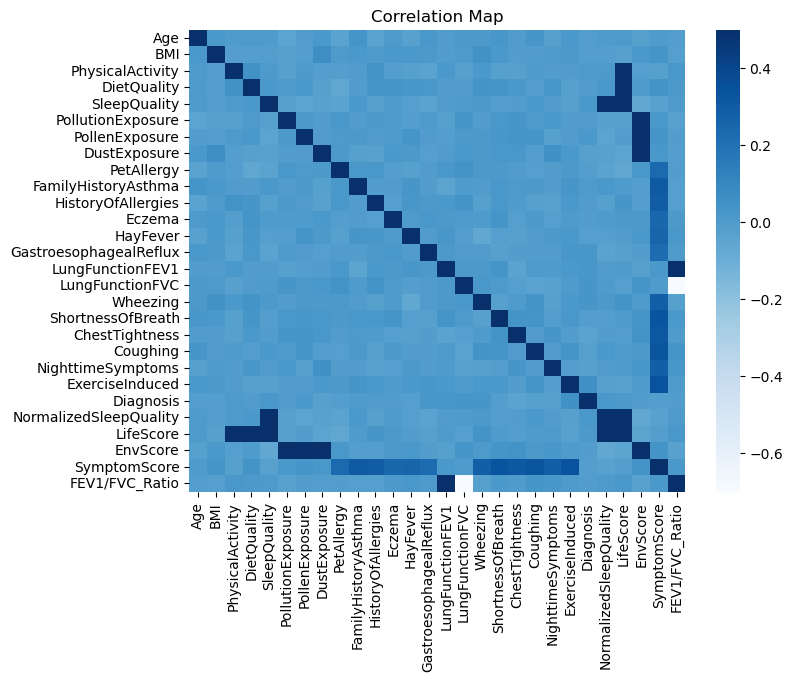

In [18]:
numeric_columns = df.select_dtypes(include=['int', 'float'])
corr_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=False, cmap='Blues', vmax=0.5)

plt.title('Correlation Map')
plt.show()

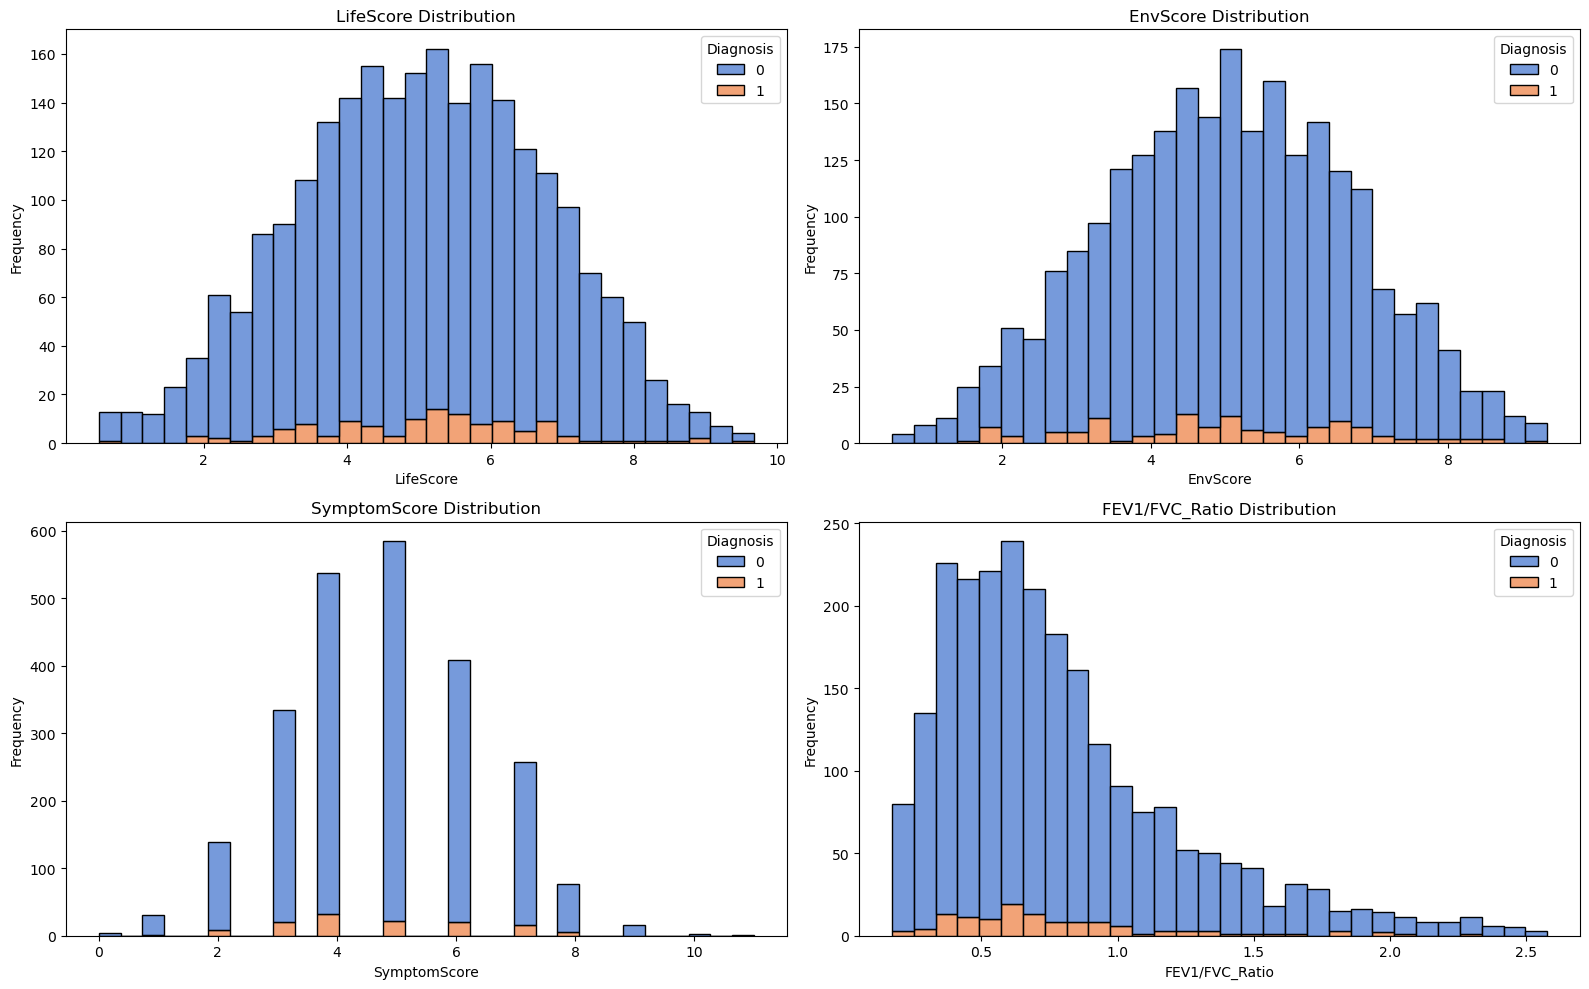

In [19]:
cols = ['LifeScore', 'EnvScore', 'SymptomScore', 'FEV1/FVC_Ratio']

plt.figure(figsize=(16, 10))

for i, column in enumerate(cols, start=1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=column, hue='Diagnosis', multiple='stack', palette='muted', bins=30)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<h1 style="color: #ca9843;">Machine Learning</h1>

<h2>Data Preprocessing</h2>

In [22]:
X = df.drop(['BmiClass', 'NormalizedSleepQuality', 'LifeScore', 'EnvScore', 'SymptomScore',"Diagnosis"], axis=1)
y = df['Diagnosis']

cat_cols = [
    'Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 
    'PetAllergy', 'FamilyHistoryAsthma', 'HistoryOfAllergies', 
    'Eczema', 'HayFever', 'GastroesophagealReflux', 
    'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 
    'Coughing', 'NighttimeSymptoms', 'ExerciseInduced'
]

num_cols = [
    'Age', 'BMI', 'LungFunctionFEV1', 'LungFunctionFVC', 
    'FEV1/FVC_Ratio', 'PhysicalActivity', 'DietQuality', 
    'SleepQuality', 'PollutionExposure', 'PollenExposure', 
    'DustExposure'
]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

<h2>Model Implementation</h2>

In [ ]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])


model.fit(X_train, y_train)

<h2>Model Performance</h2>

In [26]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Acc. Score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Set Accuracy: {train_accuracy:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")

# Classification Report
print("\nClassification Report for Test Set:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix for Test Set:")
print(conf_matrix)


Training Set Accuracy: 0.9519
Test Set Accuracy: 0.9332

Classification Report for Test Set:

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       447
           1       0.00      0.00      0.00        32

    accuracy                           0.93       479
   macro avg       0.47      0.50      0.48       479
weighted avg       0.87      0.93      0.90       479


Confusion Matrix for Test Set:
[[447   0]
 [ 32   0]]


<h2>Model Coefficients</h2>

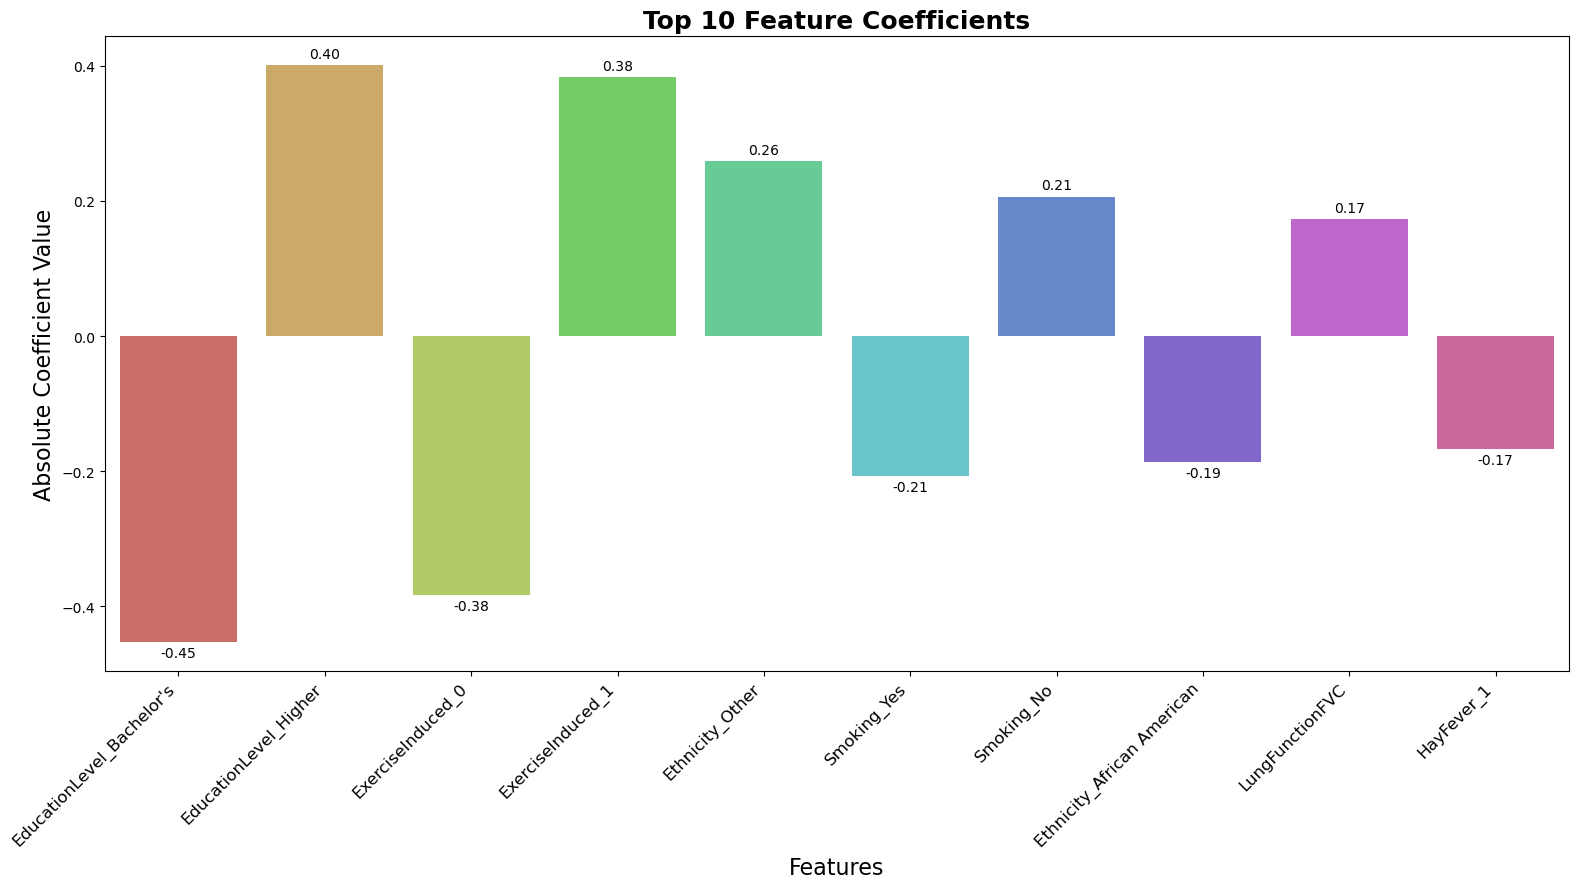

In [28]:
#Coefficients
coefficients = model.named_steps['classifier'].coef_

feature_names = model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_cols)
all_feature_names = num_cols + list(feature_names)


coef_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': np.concatenate(coefficients)
})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)


# Visualising
plt.figure(figsize=(16, 9))
ax = sns.barplot(data=coef_df.head(10), x="Feature", y="Coefficient", palette="hls")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, padding=3)

ax.set_title('Top 10 Feature Coefficients', fontsize=18, fontweight='bold')
ax.set_xlabel('Features', fontsize=16)
ax.set_ylabel('Absolute Coefficient Value', fontsize=16)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()

In [86]:
coef_df.head(10)

,Feature,Coefficient,Abs_Coefficient
17,EducationLevel_Bachelor's,-0.452508,0.452508
19,EducationLevel_Higher,0.401079,0.401079
45,ExerciseInduced_0,-0.383243,0.383243
46,ExerciseInduced_1,0.382988,0.382988
16,Ethnicity_Other,0.259080,0.259080
22,Smoking_Yes,-0.206836,0.206836
21,Smoking_No,0.206580,0.206580
13,Ethnicity_African American,-0.186189,0.186189
3,LungFunctionFVC,0.172928,0.172928
32,HayFever_1,-0.167409,0.167409


## Final Interpretation

<ul>
  <li>Model achieved <strong>93.3% accuracy score</strong> in determining whether a patient has asthma in unseen data.</li>
  <li>Model's significant coefficients are:
    <ul>
      <li><strong>Bachelor's Degree:</strong> Negative coefficient (-0.45), suggesting that having a bachelor's degree is associated with a lower likelihood of asthma compared to the baseline category.</li>
      <li><strong>Higher Education:</strong> Positive coefficient (0.40), indicating that having a higher level of education is associated with a higher likelihood of asthma.</li>
      <li><strong>Smoking (Yes):</strong> Negative coefficient (-0.21), meaning smokers are less likely to have asthma compared to non-smokers in this model.</li>
      <li><strong>Hay Fever (Yes):</strong> Negative coefficient (-0.17), suggesting that having hay fever is associated with a lower likelihood of asthma.</li>
    </ul>
  </li>
</ul>
  <h3 style="color: red;">Further Investigation:</h3>
    <ul>
      <li><strong>Smoking and Asthma:</strong> The negative coefficient for smoking is unusual. There can be made further investigation.</li>
      <li><strong>Education Levels:</strong> We can explore why asthma occurance varies with different education levels and investigate whether lifestyle and occupation play a role. Further research could provide deeper insights into these factors. </li>
    </ul>

